In [15]:
#importing libraries I will be using
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

%matplotlib inline

In [11]:
#reading the data

data = pd.read_csv('/content/drive/MyDrive/Internship/Week_1/Task1_data/firstintenproject.csv')

In [12]:
#printing the dirst 10 rows

data.head(10)

,Booking_ID,number of adults,number of children,number of weekend nights,number of week nights,type of meal,car parking space,room type,lead time,market segment type,repeated,P-C,P-not-C,average price,special requests,date of reservation,booking status
0,INN00001,1,1,2,5,Meal Plan 1,0,Room_Type 1,224,Offline,0,0,0,88.00,0,10/2/2015,Not_Canceled
1,INN00002,1,0,1,3,Not Selected,0,Room_Type 1,5,Online,0,0,0,106.68,1,11/6/2018,Not_Canceled
2,INN00003,2,1,1,3,Meal Plan 1,0,Room_Type 1,1,Online,0,0,0,50.00,0,2/28/2018,Canceled
3,INN00004,1,0,0,2,Meal Plan 1,0,Room_Type 1,211,Online,0,0,0,100.00,1,5/20/2017,Canceled
4,INN00005,1,0,1,2,Not Selected,0,Room_Type 1,48,Online,0,0,0,77.00,0,4/11/2018,Canceled
5,INN00006,1,0,0,2,Meal Plan 2,0,Room_Type 1,346,Offline,0,0,0,100.00,1,9/13/2016,Canceled
6,INN00007,1,1,1,4,Meal Plan 1,0,Room_Type 1,34,Online,0,0,0,107.55,1,10/15/2017,Not_Canceled
7,INN00008,3,0,1,3,Meal Plan 1,0,Room_Type 4,83,Online,0,0,0,105.61,1,12/26/2018,Not_Canceled
8,INN00009,1,1,0,4,Meal Plan 1,0,Room_Type 1,121,Offline,0,0,0,96.90,1,7/6/2018,Not_Canceled
9,INN00010,2,0,0,5,Meal Plan 1,0,Room_Type 4,44,Online,0,0,0,133.44,3,10/18/2018,Not_Canceled


In [16]:
data.columns

Index(['Booking_ID', 'number of adults', 'number of children',
       'number of weekend nights', 'number of week nights', 'type of meal',
       'car parking space', 'room type', 'lead time', 'market segment type',
       'repeated', 'P-C', 'P-not-C', 'average price ', 'special requests',
       'date of reservation', 'booking status'],
      dtype='object')

In [17]:
#dealing with white spaces
data.columns = data.columns.str.strip()  #Remove extra spaces in column names
data = data.applymap(lambda x: x.strip() if isinstance(x, str) else x)  #Remove spaces in text data


<ipython-input-17-bf15d2ebdb0a>:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data = data.applymap(lambda x: x.strip() if isinstance(x, str) else x)  #Remove spaces in text data


In [18]:
print(data.info())   #General dataset infp

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36285 entries, 0 to 36284
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Booking_ID                36285 non-null  object 
 1   number of adults          36285 non-null  int64  
 2   number of children        36285 non-null  int64  
 3   number of weekend nights  36285 non-null  int64  
 4   number of week nights     36285 non-null  int64  
 5   type of meal              36285 non-null  object 
 6   car parking space         36285 non-null  int64  
 7   room type                 36285 non-null  object 
 8   lead time                 36285 non-null  int64  
 9   market segment type       36285 non-null  object 
 10  repeated                  36285 non-null  int64  
 11  P-C                       36285 non-null  int64  
 12  P-not-C                   36285 non-null  int64  
 13  average price             36285 non-null  float64
 14  specia

In [19]:
print(data.describe())  #Summary stats for numerical columns

       number of adults  number of children  number of weekend nights  \
count      36285.000000        36285.000000              36285.000000   
mean           1.844839            0.105360                  0.810693   
std            0.518813            0.402704                  0.870590   
min            0.000000            0.000000                  0.000000   
25%            2.000000            0.000000                  0.000000   
50%            2.000000            0.000000                  1.000000   
75%            2.000000            0.000000                  2.000000   
max            4.000000           10.000000                  7.000000   

       number of week nights  car parking space     lead time      repeated  \
count           36285.000000       36285.000000  36285.000000  36285.000000   
mean                2.204602           0.030977     85.239851      0.025630   
std                 1.410946           0.173258     85.938796      0.158032   
min                 0.0000

Remidnder :

Lead time → the number of days between the booking date and the actual check-in date.

P_c → Number of previous cancellations a customer has made.

P_no_c → Number of previous non-cancellations (successful bookings where the customer actually stayed).


#Outliers

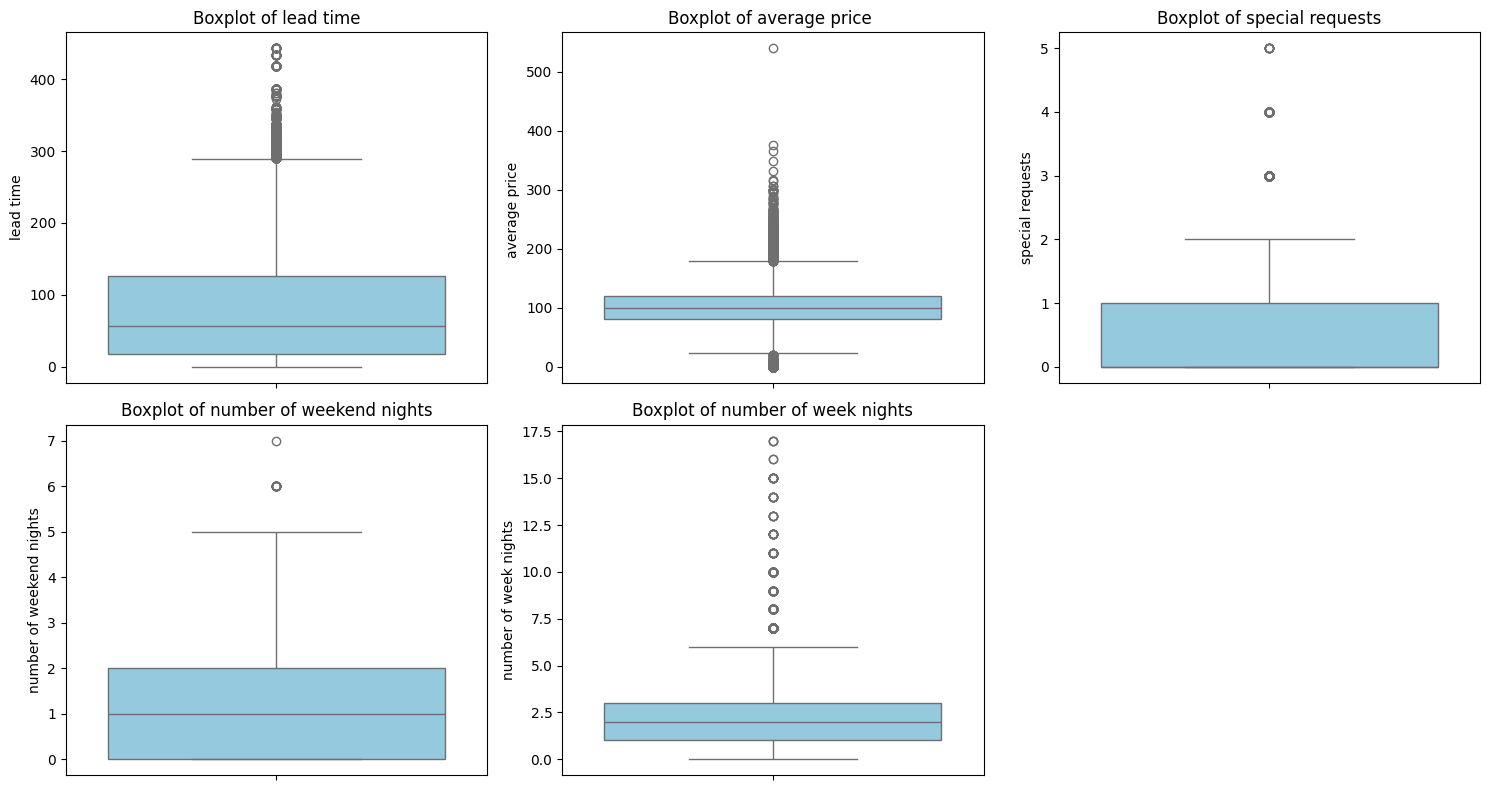

In [14]:
#Checking and fixing outliers on numerical columns

numerical_cols = ['lead time', 'average price ', 'special requests', 'number of weekend nights', 'number of week nights']

plt.figure(figsize=(15,8))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=data[col],color='skyblue')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

#Fixing outliers using transforming method

- Not all outliers need to be removed, as some may represent valuable data points that are important for the model. Outliers can sometimes indicate rare but meaningful occurrences, and removing them without consideration could lead to the loss of important patterns in the data.

- I will be focusing on handling outliers specifically in the 'Lead Time' and 'Average Price' columns to ensure that extreme values do not distort the model while preserving important data.

Text(0.5, 1.0, 'Original Distribution - Lead Time')

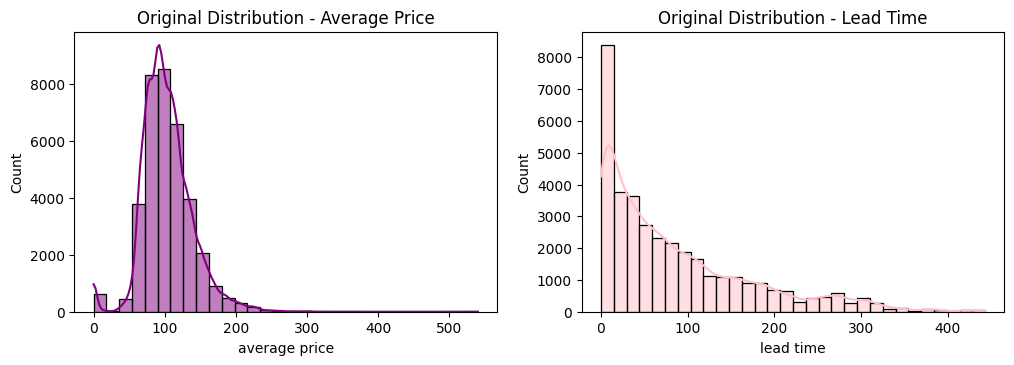

In [20]:
# Define the columns
cols = ['average price', 'lead time']

# Create a 2x2 plot (2 rows, 2 columns)
plt.figure(figsize=(12, 8))

# Original Distribution for Average Price
plt.subplot(2, 2, 1)
sns.histplot(data['average price'], kde=True, color='purple', bins=30)
plt.title('Original Distribution - Average Price')

# Original Distribution for Lead Time
plt.subplot(2, 2, 2)
sns.histplot(data['lead time'], kde=True, color='pink', bins=30)
plt.title('Original Distribution - Lead Time')

# Observation :

- Lead time shows right skewness, so applying a transformation would help in normalizing it.

- Average Price feature shows an almost normal distribution, the outliers are likely valid data points and are not expected to significantly distort the model. Therefore, we will not handle or remove outliers from this feature. Instead, we will focus on handling outliers in the 'Lead Time' feature, which exhibits right skewness

Box-Cox Lambda for 'lead time': 0.2687825869994549


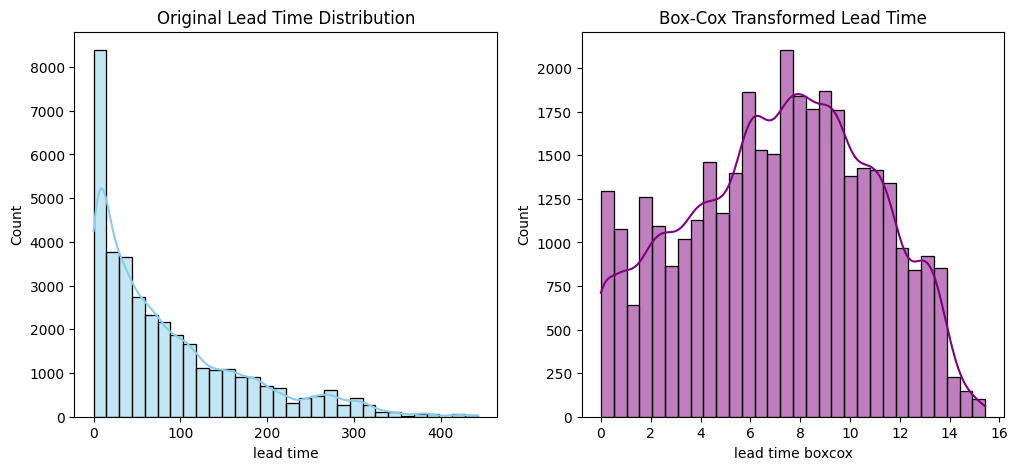

In [22]:
from scipy.stats import boxcox

# Step 1: Ensure "lead time" has only positive values
data['lead time adjusted'] = data['lead time'] + 1  # Shift all values by 1 to make them positive

# Step 2: Apply Box-Cox transformation on the adjusted column
data['lead time boxcox'], lambda_param = boxcox(data['lead time adjusted'])

# Step 3: Print lambda to verify transformation
print(f"Box-Cox Lambda for 'lead time': {lambda_param}")

# Step 4: Plot original vs transformed distributions
fig, axes = plt.subplots(1, 2, figsize=(12, 5), dpi=100)

sns.histplot(data['lead time'], bins=30, kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Original Lead Time Distribution')

sns.histplot(data['lead time boxcox'], bins=30, kde=True, ax=axes[1], color='purple')
axes[1].set_title('Box-Cox Transformed Lead Time')

plt.show()


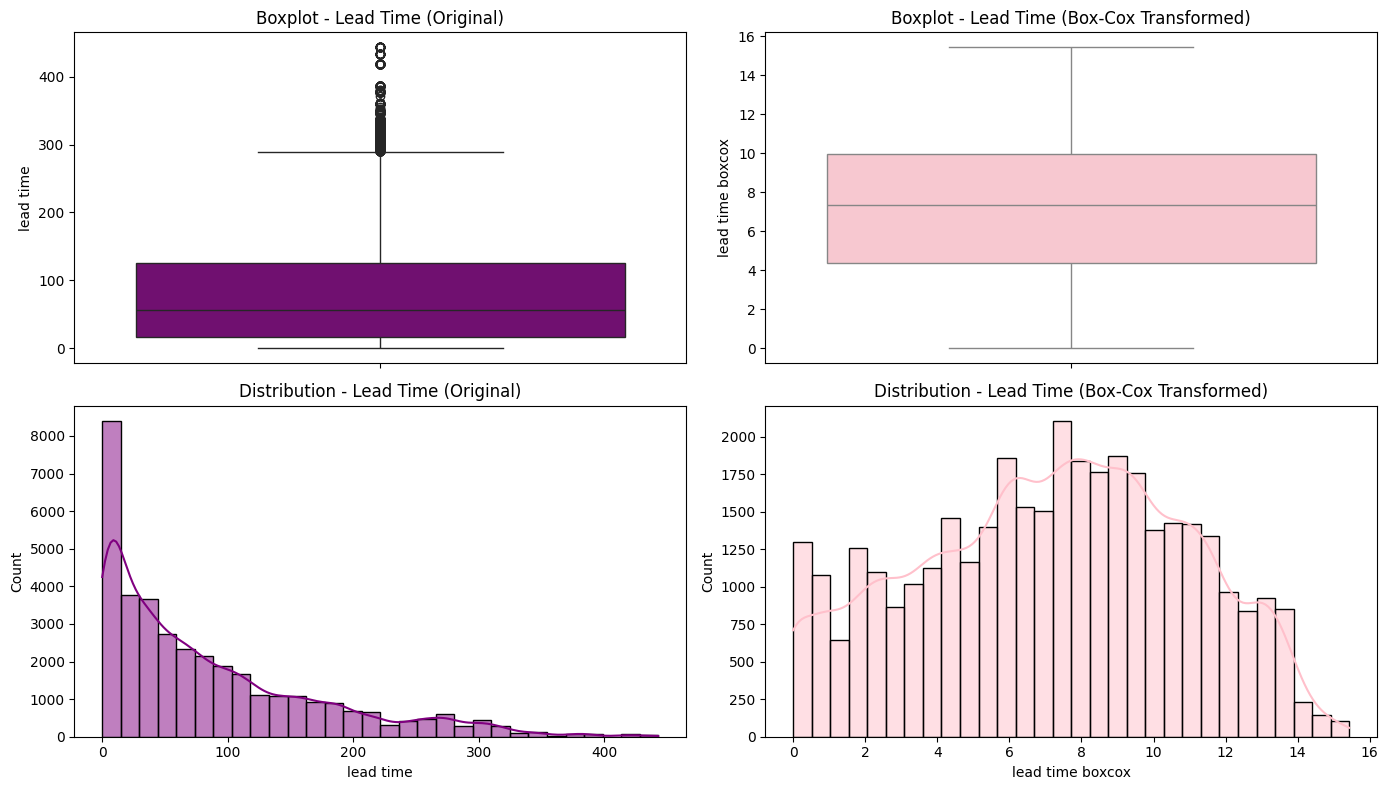

In [23]:
# Set up the plot
plt.figure(figsize=(14, 8))

# Boxplot before handling outliers (original 'lead time')
plt.subplot(2, 2, 1)
sns.boxplot(y=data['lead time'], color='purple')
plt.title('Boxplot - Lead Time (Original)')

# Boxplot after handling outliers (Box-Cox transformed 'lead time')
plt.subplot(2, 2, 2)
sns.boxplot(y=data['lead time boxcox'], color='pink')
plt.title('Boxplot - Lead Time (Box-Cox Transformed)')

# Distribution plot before handling outliers (original 'lead time')
plt.subplot(2, 2, 3)
sns.histplot(data['lead time'], kde=True, color='purple', bins=30)
plt.title('Distribution - Lead Time (Original)')

# Distribution plot after handling outliers (Box-Cox transformed 'lead time')
plt.subplot(2, 2, 4)
sns.histplot(data['lead time boxcox'], kde=True, color='pink', bins=30)
plt.title('Distribution - Lead Time (Box-Cox Transformed)')

# Adjust layout for better visualization
plt.tight_layout()
plt.show()

The **Box-Cox** transformation was applied to the 'Lead Time' feature to normalize the distribution. It reduced the right skewness and compressed the outliers, making the data more symmetric and suitable for analysis and modeling.

# **Data visualization**

Visualizing data in order to understand the relationships between columns and each other.

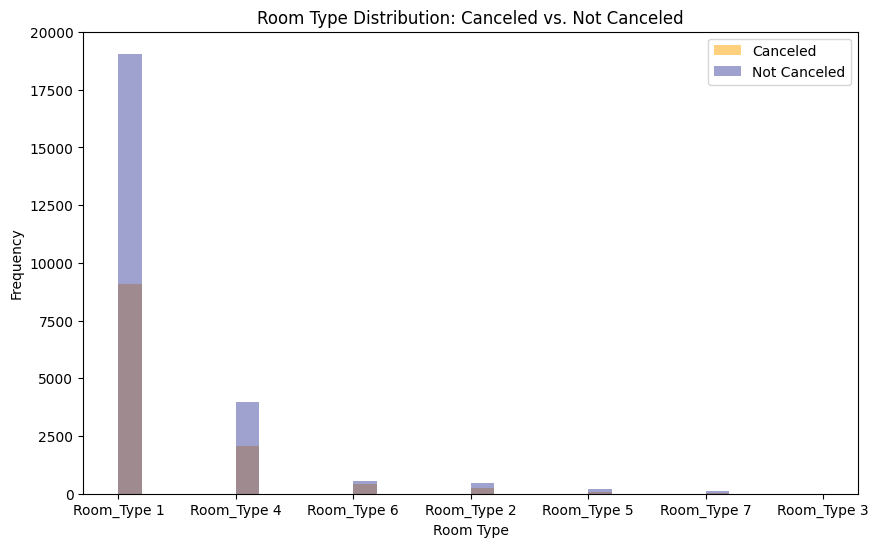

In [25]:
# Focusing on cancellation

# Cancellation vs. Room Type shows how cancellation status (Canceled or not Canceled) is distributed across different room types.

plt.figure(figsize=(10, 6))

# Filter data for 'Canceled' bookings and 'Not Canceled' bookings
plt.hist(data[data['booking status'] == 'Canceled']['room type'],
         bins=30, alpha=0.5, label='Canceled', color='orange')
plt.hist(data[data['booking status'] == 'Not_Canceled']['room type'],  # Provide data for 'Not Canceled' bookings
         bins=30, alpha=0.5, label='Not Canceled', color='#4045a1')

# Adding labels and title
plt.title('Room Type Distribution: Canceled vs. Not Canceled')
plt.xlabel('Room Type')
plt.ylabel('Frequency')
plt.legend()

# Show the plot
plt.show()

Room type 1 had more bookings overall, while room type 3 was the least to be reserved.

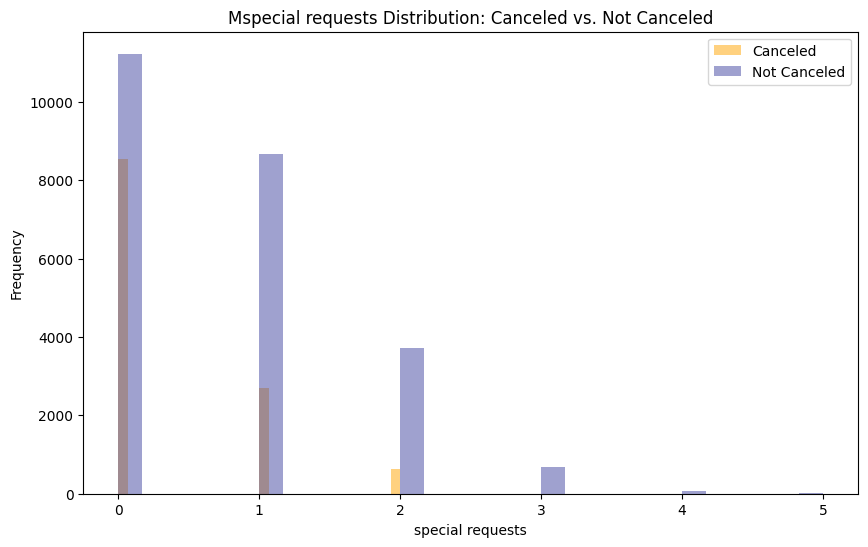

In [26]:
# Cancellation and Special Requests

plt.figure(figsize=(10, 6))
plt.hist(data[data['booking status'] == 'Canceled']['special requests'],
         bins=30, alpha=0.5, label='Canceled', color='orange')
plt.hist(data[data['booking status'] == 'Not_Canceled']['special requests'],
         bins=30, alpha=0.5, label='Not Canceled', color='#4045a1')

# Adding labels and title
plt.title('Mspecial requests Distribution: Canceled vs. Not Canceled')
plt.xlabel('special requests')
plt.ylabel('Frequency')
plt.legend()

# Show the plot
plt.show()


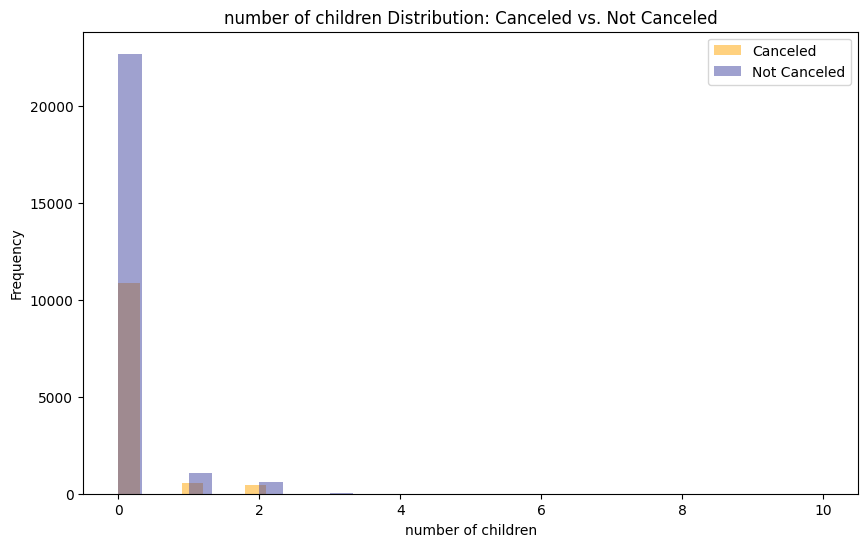

In [27]:
# Number of Children vs Cancellation

plt.figure(figsize=(10, 6))
plt.hist(data[data['booking status'] == 'Canceled']['number of children'],
         bins=30, alpha=0.5, label='Canceled', color='orange')
plt.hist(data[data['booking status'] == 'Not_Canceled']['number of children'],
         bins=30, alpha=0.5, label='Not Canceled', color='#4045a1')

# Adding labels and title
plt.title('number of children Distribution: Canceled vs. Not Canceled')
plt.xlabel('number of children')
plt.ylabel('Frequency')
plt.legend()

# Show the plot
plt.show()


From the figure above, we observe that people with 0-1 children account for the majority of reservations, as the data appears to be centered around this group.

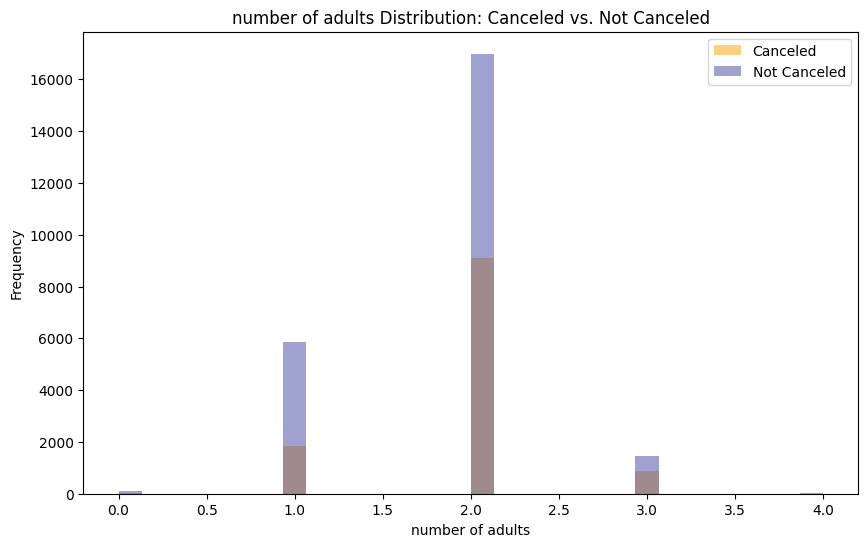

In [28]:
# number of adults vs cancellation

plt.figure(figsize=(10, 6))
plt.hist(data[data['booking status'] == 'Canceled']['number of adults'],
         bins=30, alpha=0.5, label='Canceled', color='orange')
plt.hist(data[data['booking status'] == 'Not_Canceled']['number of adults'],
         bins=30, alpha=0.5, label='Not Canceled', color='#4045a1')

# Adding labels and title
plt.title('number of adults Distribution: Canceled vs. Not Canceled')
plt.xlabel('number of adults')
plt.ylabel('Frequency')
plt.legend()

# Show the plot
plt.show()


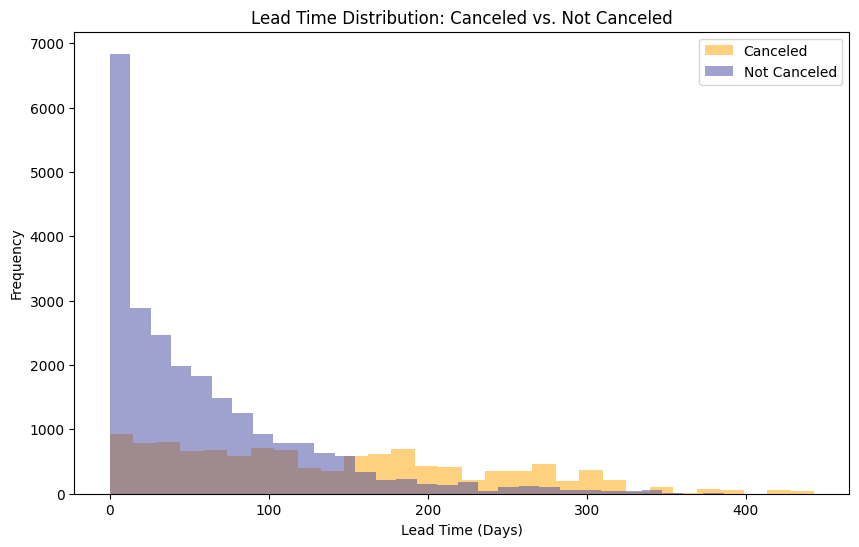

In [29]:
# Lead time vs cancellation

plt.figure(figsize=(10, 6))
plt.hist(data[data['booking status'] == 'Canceled']['lead time'],
         bins=30, alpha=0.5, label='Canceled', color='orange')
plt.hist(data[data['booking status'] == 'Not_Canceled']['lead time'],
         bins=30, alpha=0.5, label='Not Canceled', color='#4045a1')

# Adding labels and title
plt.title('Lead Time Distribution: Canceled vs. Not Canceled')
plt.xlabel('Lead Time (Days)')
plt.ylabel('Frequency')
plt.legend()

# Show the plot
plt.show()


From the above plot, I can see:

The frequency of non-canceled bookings increases as the lead time decreases, and vice versa. Additionally, it appears that the rate of cancellations remains relatively consistent across different lead times, staying within a similar range.

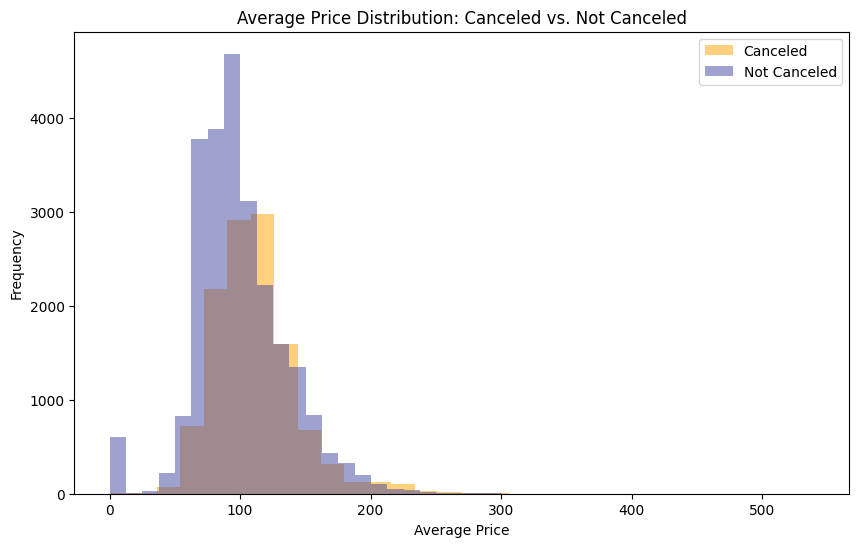

In [31]:
# Cancellation and average price

plt.figure(figsize=(10, 6))
plt.hist(data[data['booking status'] == 'Canceled']['average price'],
         bins=30, alpha=0.5, label='Canceled', color='orange')
plt.hist(data[data['booking status'] == 'Not_Canceled']['average price'],
         bins=30, alpha=0.5, label='Not Canceled', color='#4045a1')

# Adding labels and title
plt.title('Average Price Distribution: Canceled vs. Not Canceled')
plt.xlabel('Average Price')
plt.ylabel('Frequency')
plt.legend()

# Show the plot
plt.show()


The figure displaying the Average Price Distribution and Booking Status reveals an approximately normal distribution for both canceled and non-canceled bookings. This suggests the following insights:

Price alone does not appear to have a strong influence on the booking status.

Other factors may play a more significant role in determining whether a booking is canceled or not.

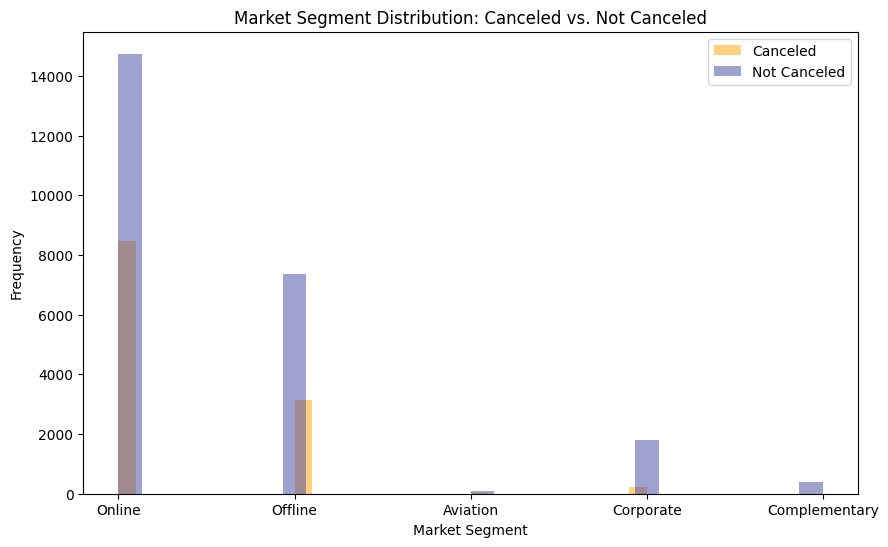

In [32]:
# Cancellation and Market Segment

plt.figure(figsize=(10, 6))
plt.hist(data[data['booking status'] == 'Canceled']['market segment type'],
         bins=30, alpha=0.5, label='Canceled', color='orange')
plt.hist(data[data['booking status'] == 'Not_Canceled']['market segment type'],
         bins=30, alpha=0.5, label='Not Canceled', color='#4045a1')

# Adding labels and title
plt.title('Market Segment Distribution: Canceled vs. Not Canceled')
plt.xlabel('Market Segment')
plt.ylabel('Frequency')
plt.legend()

# Show the plot
plt.show()


From the graph above, we can see that:

The online segment has the highest number of bookings, which means it plays the biggest role in whether a booking is made or not. This makes sense because most people find it easy and convenient to book things online.

On the other hand, the aviation and complementary segments have very few bookings, so they don’t seem to have much of an impact.

This tells us that focusing on improving the online booking experience could help attract more customers. It might also be worth looking into why the other segments aren’t contributing much and if there’s a way to make them more effective.

In [33]:
data.columns

Index(['Booking_ID', 'number of adults', 'number of children',
       'number of weekend nights', 'number of week nights', 'type of meal',
       'car parking space', 'room type', 'lead time', 'market segment type',
       'repeated', 'P-C', 'P-not-C', 'average price', 'special requests',
       'date of reservation', 'booking status', 'lead time adjusted',
       'lead time boxcox'],
      dtype='object')

# **Notes on the Previous Plots (Overall)**
We’re looking at how customers’ booking behavior changes based on:

Timing (lead time),

Preferences (room type),

Booking method (online), and

Price.

Here’s what stands out:

Lead time and room type preferences seem to play a big role in whether customers book or cancel.

Online bookings have the biggest impact on booking decisions, while other methods (like aviation or complementary segments) don’t contribute as much.

Price doesn’t seem to be the main reason for cancellations. Instead, factors like room availability, booking platform, and lead time might be more important.

#Continuing to visualize data

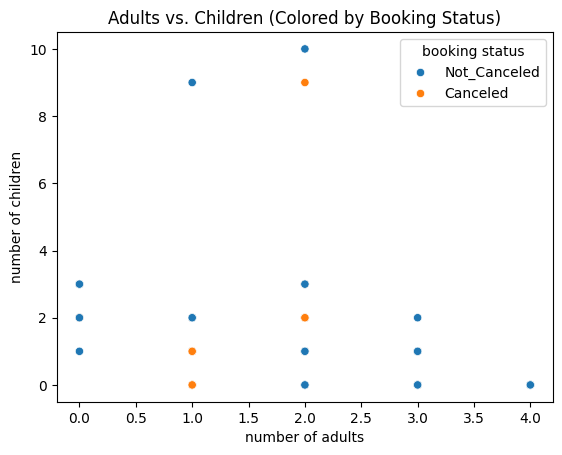

In [34]:
#Relation between number of adults to number of children

sns.scatterplot(data=data, x='number of adults', y='number of children', hue='booking status')
plt.title('Adults vs. Children (Colored by Booking Status)')
plt.show()

From the scatter plot above, there is no clear relationship between the number of adults, number of children, and booking status (canceled or not canceled).

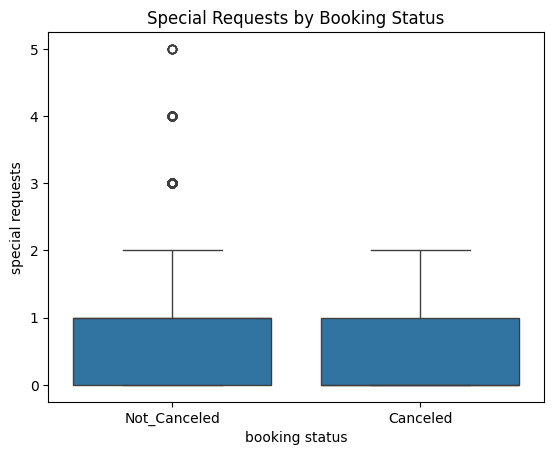

In [35]:
#The relation between cancelled and not cancelled booking with the special requests.

sns.boxplot(data=data, x='booking status', y='special requests')
plt.title('Special Requests by Booking Status')
plt.show()

# From the box plot above, we observe that:

- Not Canceled bookings tend to have a slightly higher median number of special requests compared to Canceled bookings.
- There are three outliers in the Not Canceled category, indicating some bookings had higher special requests than usual.
- The interquartile range (IQR) for Not Canceled bookings appears wider than for Canceled bookings, suggesting more variability in special requests.
- This could indicate that guests who make special requests are slightly more likely to complete their bookings.

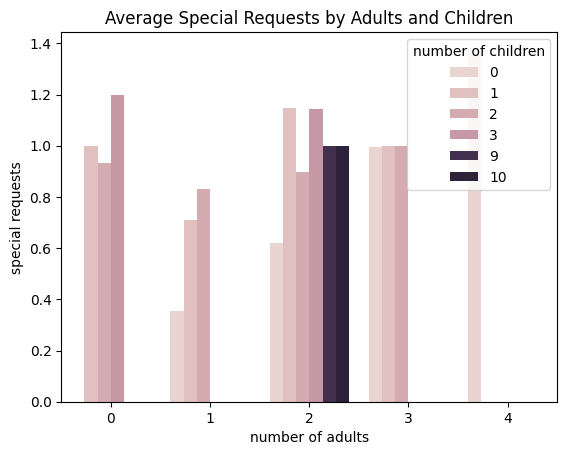

In [36]:
grouped = data.groupby(['number of adults', 'number of children'])['special requests'].mean().reset_index()
sns.barplot(data=grouped, x='number of adults', y='special requests', hue='number of children')
plt.title('Average Special Requests by Adults and Children')
plt.show()

There is no clear relationship between the number of adults and the number of children. However, bookings with two or more children tend to have more special requests compared to those with fewer than two children. This suggests that families with more children might have additional needs or preferences during their stay.

#Heat map for the relations

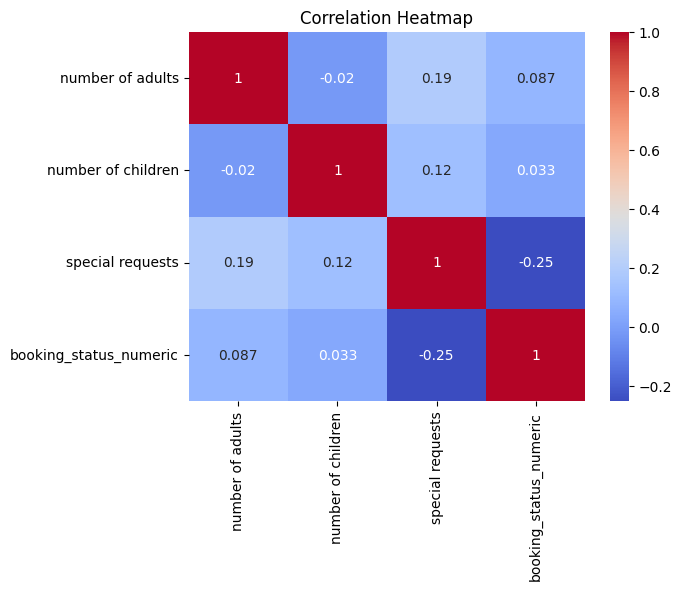

In [37]:
# Convert 'booking status' to numerical representation before calculating correlation
data['booking_status_numeric'] = data['booking status'].map({'Canceled': 1, 'Not_Canceled': 0})

# Calculate correlation using the numerical representation
sns.heatmap(data[['number of adults', 'number of children', 'special requests', 'booking_status_numeric']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


The correlation heatmap shows weak relationships between the analyzed features and booking status. The strongest correlation is between special requests and booking status at -0.25, suggesting that customers with more special requests are slightly less likely to cancel. However, most features in the heatmap don’t show strong linear relationships with cancellations, indicating that other factors or non-linear patterns may be more influential

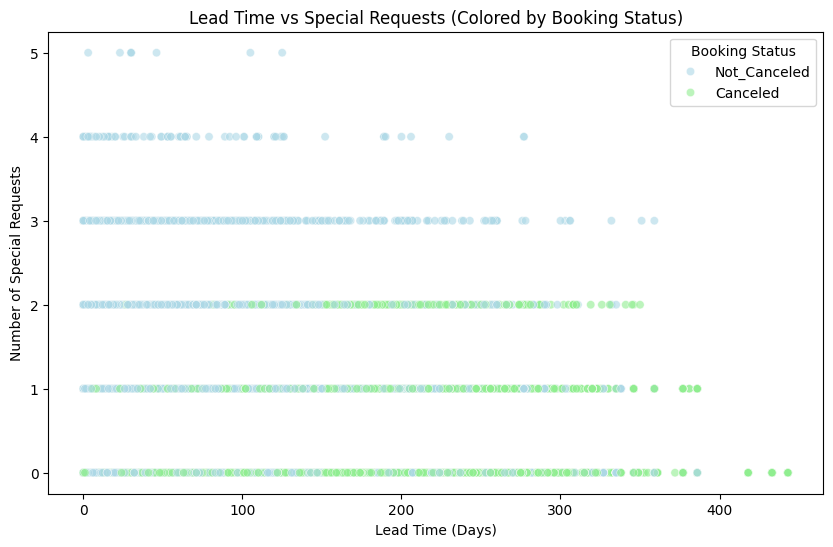

In [38]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='lead time', y='special requests', hue='booking status',
                palette={'Canceled': 'lightgreen', 'Not_Canceled': 'lightblue'}, alpha=0.6)

plt.title('Lead Time vs Special Requests (Colored by Booking Status)')
plt.xlabel('Lead Time (Days)')
plt.ylabel('Number of Special Requests')
plt.legend(title="Booking Status")
plt.show()


Observation :

- Cancellation decreases as the number of special requests increases.

- Customers who make more special requests are less likely to cancel their bookings.
- This could be because they have specific needs and are more committed to their stay.
- Cancellation increases as lead time increases.

- The longer the lead time, the higher the chances of cancellation.
Customers who book far in advance might change their plans, find better deals, or cancel for other reasons.


Note: There is a negative correlation between lead time and special requests. As lead time increases, the number of special requests tends to decrease. This suggests that guests who book closer to the check-in date are more likely to have specific needs, leading to more special requests. Additionally, bookings with more special requests have a lower cancellation rate, while bookings made far in advance are more prone to cancellation.

# Overall noted and observation :


1. **Room Type and Cancellation:**
   - **Room Types 1 and 4** tend to have the highest number of bookings, with **Room Type 3 and 7** being booked the least.
   - The cancellation rate appears to be relatively high across all room types, but **Room Type 1** has more cancellations than others.
  
2. **Lead Time and Cancellation:**
   - A **positive correlation** is observed between **lead time** and **cancellation**, meaning that bookings made far in advance have a higher chance of being canceled. This could be due to changing plans or guests finding better options later on.
  
3. **Average Price and Cancellation:**
   - The **average price** for both **canceled** and **not canceled** bookings is almost normally distributed. This suggests that price does not have a **strong effect** on whether a booking is canceled or not, as cancellations are spread across various price points.

4. **Market Segment and Cancellation:**
   - The **Online** segment has the highest number of bookings and cancellations, indicating its significant influence on booking behavior. The **Aviation** and **Complementary** segments have a smaller impact.
  
5. **Number of Adults, Children, and Special Requests:**
   - There's **no strong relationship** between the **number of adults and children**, but bookings with **2 or more children** tend to have **more special requests**.
   - Special requests appear to have **a slight correlation with booking status**: bookings with more special requests tend to have a lower cancellation rate.
  
6. **Lead Time vs Special Requests:**
   - As **lead time increases**, the number of special requests tends to **decrease**, suggesting that guests who book closer to the date may have more specific needs or requests.
   - There is also an observed relationship where bookings with **more special requests** are **less likely to be canceled**, while longer lead times tend to increase the chance of cancellation.
  
---

### **Summary**
- **Room Type and Lead Time** play a significant role in cancellation rates, with **Room Type 1** and longer lead times being more prone to cancellations.
- **Special requests** seem to influence the likelihood of cancellations, with bookings that involve special requests having **lower cancellation rates**.
- **Market segment** is another important factor, with **Online** being the dominant segment.

Overall, these insights suggest that **lead time, room type, special requests, and market segment** are the most relevant factors that affect booking cancellations.

---


# KNN model applying

In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Convert categorical columns to numeric (e.g., 'market segment type', 'room type', 'booking status')
label_cols = ['market segment type', 'room type', 'booking status']  # Example categorical columns
encoder = LabelEncoder() #using label encoder

for col in label_cols:
    data[col] = encoder.fit_transform(data[col].astype(str))


# Feature selection
X = data[['lead time', 'average price', 'number of adults', 'number of children']]  # Example features
y = data['booking status']  # Target variable (booking status: Canceled or Not Canceled)

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = knn.predict(X_test_scaled)

# Accuracy and confusion matrix
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.80
Confusion Matrix:
[[2137 1457]
 [ 769 6523]]


# Logistic regression

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
log_reg.fit(X_train, y_train)

# Make predictions
y_pred_log = log_reg.predict(X_test)

# Evaluate the model
accuracy_log = accuracy_score(y_test, y_pred_log)
conf_matrix_log = confusion_matrix(y_test, y_pred_log)
class_report_log = classification_report(y_test, y_pred_log)

# Print results
print(f"Accuracy: {accuracy_log:.2f}")
print("Confusion Matrix:")
print(conf_matrix_log)
print("Classification Report:")
print(class_report_log)


Accuracy: 0.76
Confusion Matrix:
[[1630 1964]
 [ 647 6645]]
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.45      0.56      3594
           1       0.77      0.91      0.84      7292

    accuracy                           0.76     10886
   macro avg       0.74      0.68      0.70     10886
weighted avg       0.75      0.76      0.74     10886

